In [54]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def print_means(df, evals):
    mus = ["0.4", "0.5", "0.6"]
    for _eval in evals:
            for mu in mus:
                for algo in df.algo.unique():
                    algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]
                    avg = algo_rows["modularity - algo"].mean()
                    print(f"avg for: {algo}, {mu}, {_eval}:\t {avg}")
    return

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"NLP-100-TL-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"NLP-150-TL-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"NLP-200-TL-{timelimit}", "NLP200", inplace=True)
    
    df["algo"].replace(f"LLP-100", "LLP100", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 150", "LLP150", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 200", "LLP200", inplace=True)
    
    return df

def run_visu(input_folder):
    df = create_united_df(input_folder)
    return df

def run_visu_benchmark(input_folder):
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, input_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    return df

def create_bar_graphs_benchmark(df, evals, title="Graph"):
    for eval in evals:

        ax = sns.barplot(x="network", y=eval, hue="algo", data=df).set(title=title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

def create_bar_graphs(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        sns_plot = sns.barplot(x="mu", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()



evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]

In [42]:
# # on yeast and arabidopsis
# input_folder = "31-05-2022--17-44-19 ara mod"
# df = run_visu_benchmark(input_folder)
# # display(df)
# create_bar_graphs_benchmark(df,evals)

# Comparisons

# With no splitting
Running our changed louvain algo with ILP without splitting mega-nodes

## 1,000 nodes

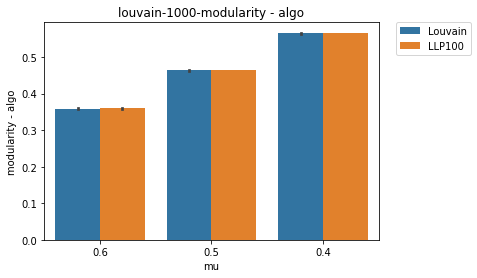

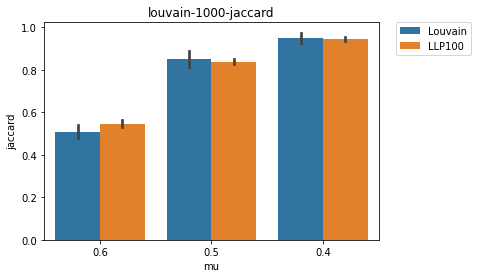

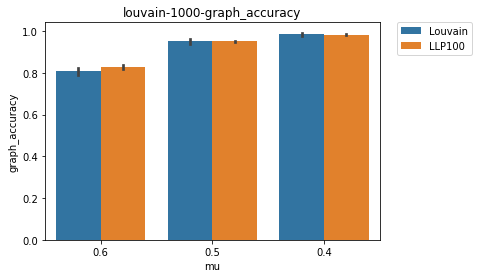

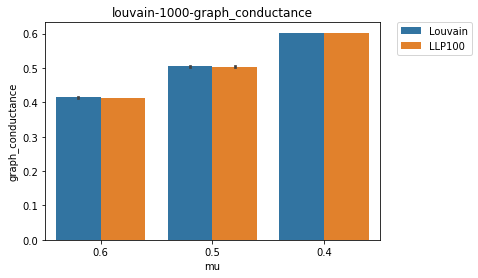

In [72]:
input_folder = "26-05-2022--15-13-20-louvain-1000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="louvain-1000")
# print_means(df, evals)
# display(df)

## 10,000 nodes

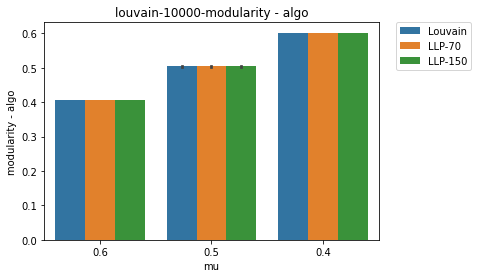

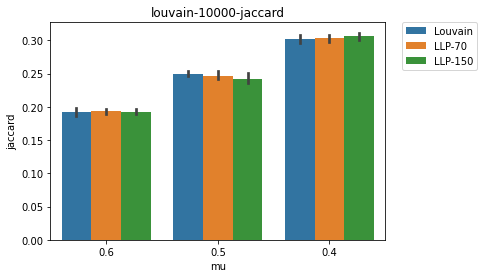

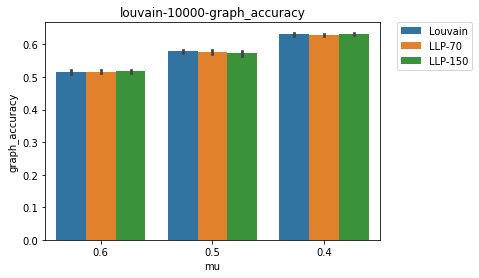

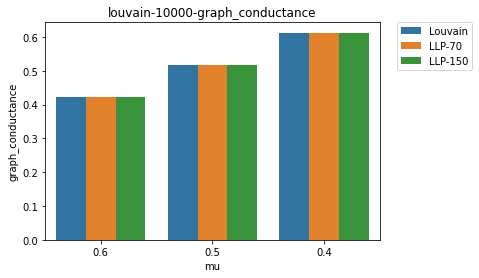

In [73]:
input_folder = "26-05-2022--14-00-54-louvain-10000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="louvain-10000")
# print_means(df, evals)
# display(df)

# Greedy modularity
Create a subgraph from mega node split mega node with greedy_modularity_communitiesn of networkX

## 10,000 nodes

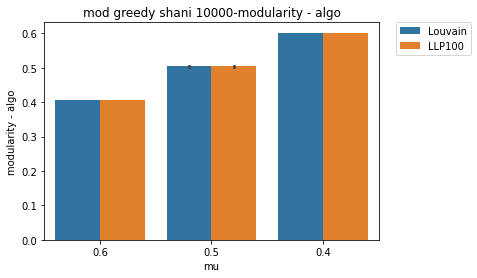

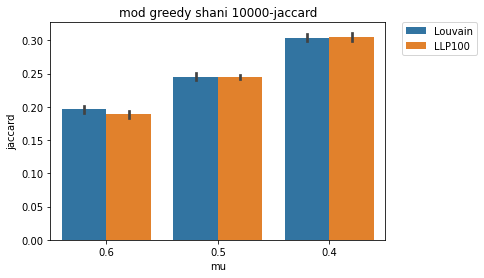

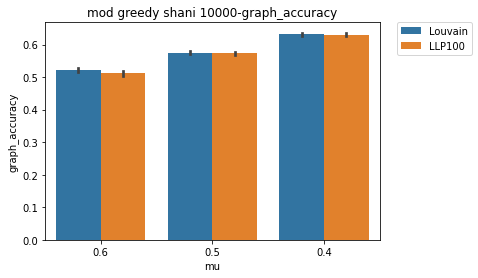

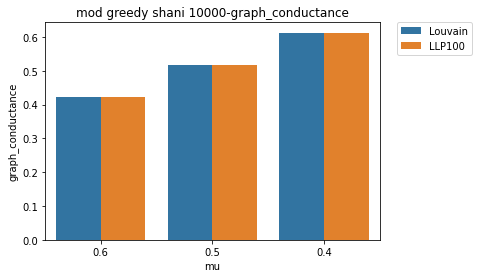

In [63]:

input_folder = "07-06-2022--13-12-29 mod greedy shani 10000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="mod greedy shani 10000")
# print_means(df, evals)
# display(df)


## 1,000 nodes

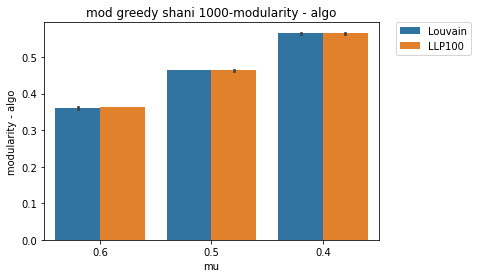

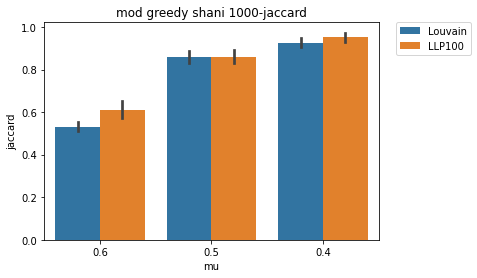

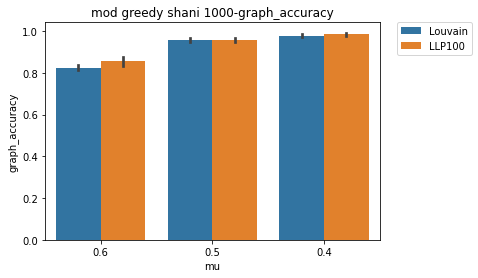

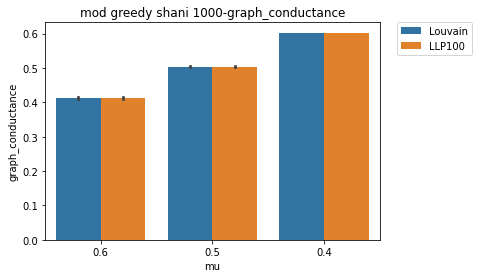

In [64]:
#benchmarks
input_folder = "07-06-2022--13-12-29 mod greedy shani 1000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="mod greedy shani 1000")
# print_means(df, evals)
# display(df)

# Random
Split a mega node to 2 groups randomly

## 10,000 nodes

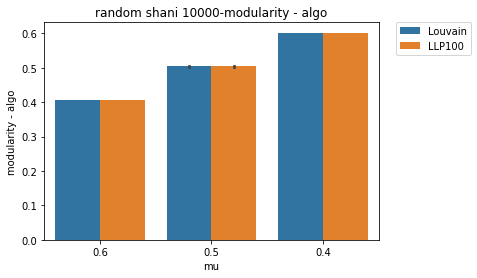

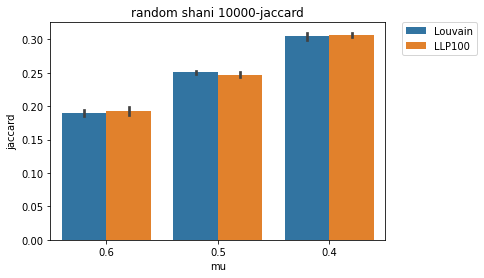

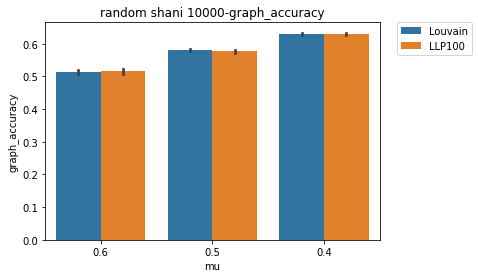

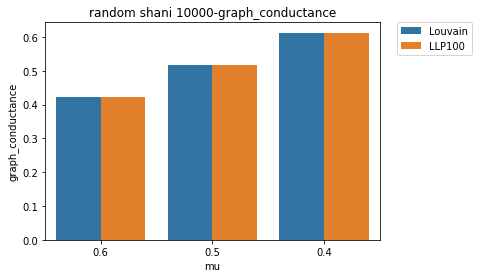

In [65]:
input_folder = "08-06-2022--09-45-28 random shani 10000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="random shani 10000")
# print_means(df, evals)
# display(df)


## 1,000 nodes

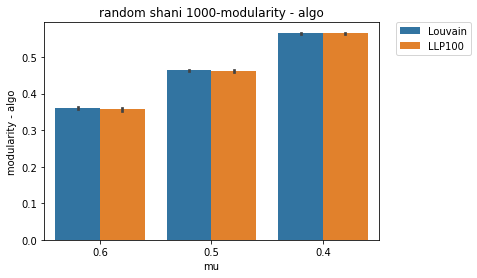

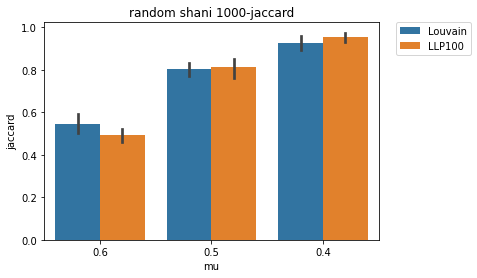

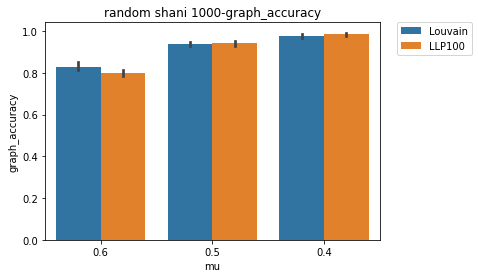

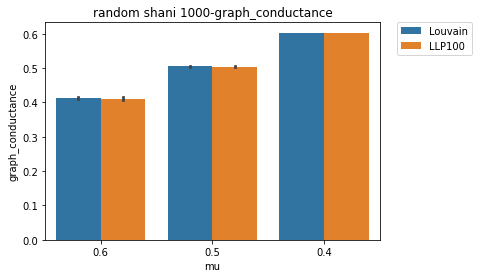

In [66]:
input_folder = "08-06-2022--09-45-28 random shani 1000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="random shani 1000")
# print_means(df, evals)
# display(df)

# Min-cut
Create a subgraph from mega node and choose 2 nodes randomly and use [min-cut](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.minimum_cut.html) of networkX

## 10,000 nodes

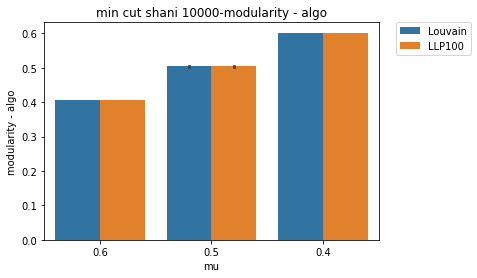

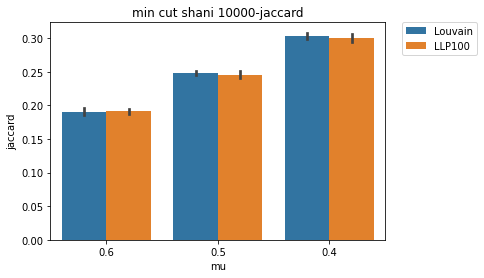

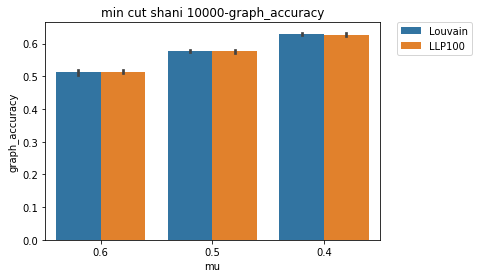

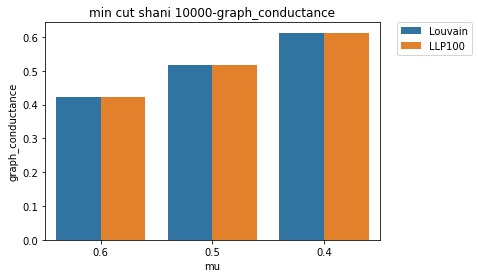

In [67]:
input_folder = "08-06-2022--00-02-16 min cut shani 10000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="min cut shani 10000")
# print_means(df, evals)
# display(df)

## 1,000 nodes

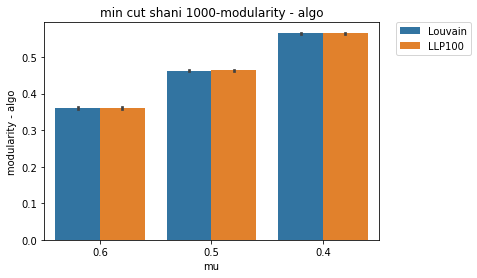

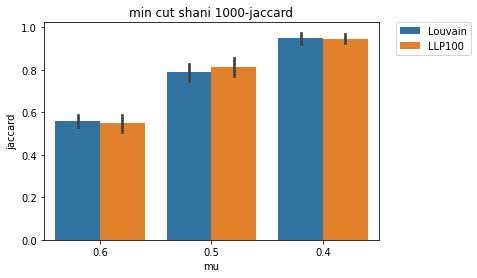

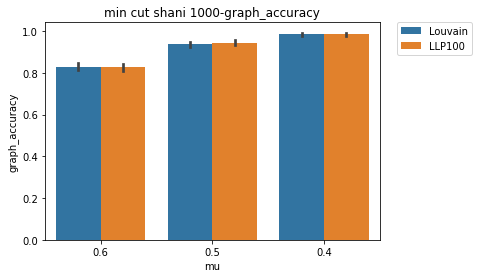

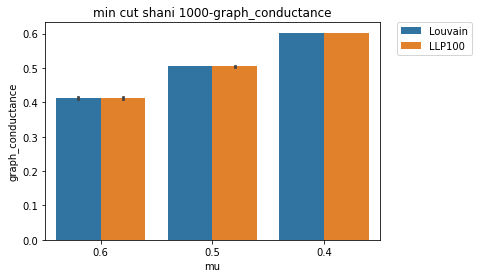

In [68]:
input_folder = "08-06-2022--00-02-16 min cut shani 1000"
df = run_visu(input_folder)
create_bar_graphs(df,evals,title="min cut shani 1000")
# print_means(df, evals)
# display(df)

## Yeast
## Arabidopsis
